In [20]:
import pandas as pd

In [28]:
df = pd.read_csv("annotations/video-1_annotations_20250922_182616.csv")

In [29]:
df.head()

,video_name,frame_number,state,window_size,mean_distance,median_distance,mean_player1_intensity,median_player1_intensity,mean_player2_intensity,median_player2_intensity,mean_combined_intensity,median_combined_intensity,median_player1_x,median_player1_y,median_player2_x,median_player2_y,avg_player1_x,avg_player1_y,avg_player2_x,avg_player2_y
0,video-1,49,start,50,3.715631,3.501079,0.018545,0.017528,0.107130,0.135514,0.125675,0.142307,4.999520,6.001156,2.423724,8.282777,5.016549,5.964411,2.244695,8.436421
1,video-1,56,active,50,3.572883,3.501079,0.022390,0.020749,0.109279,0.126952,0.131669,0.142468,4.924370,5.978456,2.423724,8.278832,4.935985,5.922077,2.301756,8.333801
2,video-1,99,active,50,2.892143,3.336702,0.503824,0.244201,0.021475,0.018963,0.525299,0.307379,3.960081,5.933846,1.812039,8.269290,3.725289,6.507813,1.752103,8.282223
3,video-1,149,active,50,2.245745,2.512717,0.239455,0.050198,0.129827,0.023244,0.369283,0.195122,3.093604,6.652156,1.272978,8.224816,2.860482,7.195935,1.335995,8.130739
4,video-1,199,active,50,1.090697,1.099367,0.247456,0.240964,0.103436,0.060564,0.350892,0.310589,1.604459,8.990866,2.256221,8.303995,1.937521,8.479923,2.117987,8.312526


In [34]:
df["median_distance"] = df["median_distance"].rolling(window=3).mean()

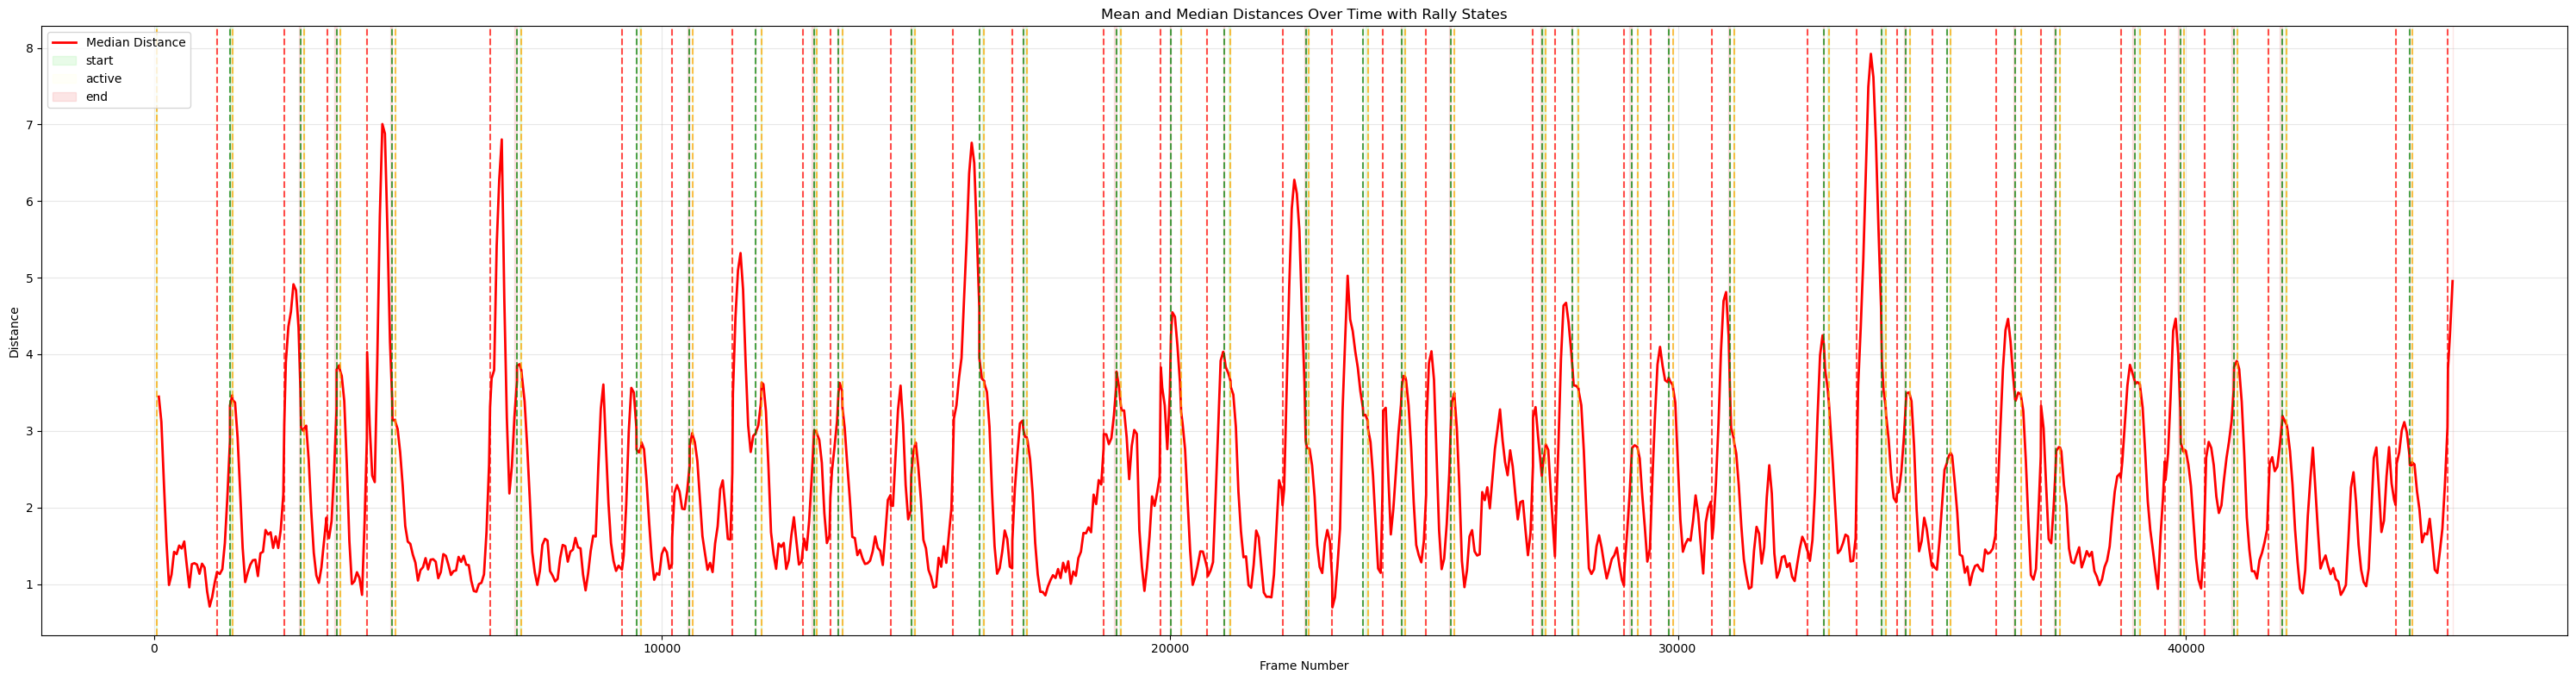

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(30, 8))

# Plot mean and median distances
# ax.plot(
#     df["frame_number"],
#     df["mean_distance"],
#     label="Mean Distance",
#     linewidth=2,
#     color="blue",
# )
ax.plot(
    df["frame_number"],
    df["median_distance"],
    label="Median Distance",
    linewidth=2,
    color="red",
)

# Add vertical dashed lines and background regions for state changes
state_colors = {
    "start": "lightgreen",
    "active": "lightyellow",
    "end": "lightcoral",
    "inactive": "lightgray",
}
state_line_colors = {
    "start": "green",
    "active": "orange",
    "end": "red",
    "inactive": "gray",
}

# Get state transitions
prev_state = None
prev_frame = None

for i, row in df.iterrows():
    current_state = row["state"]
    current_frame = row["frame_number"]

    if prev_state is not None and prev_state != current_state:
        # Add vertical dashed line at state transition
        ax.axvline(
            x=current_frame,
            color=state_line_colors.get(current_state, "black"),
            linestyle="--",
            alpha=0.7,
            linewidth=1.5,
        )

        # Add background color for previous state region
        if prev_frame is not None:
            ax.axvspan(
                prev_frame,
                current_frame,
                alpha=0.2,
                color=state_colors.get(prev_state, "white"),
                label=(
                    f"{prev_state}"
                    if prev_state not in ax.get_legend_handles_labels()[1]
                    else ""
                ),
            )

    prev_state = current_state
    prev_frame = current_frame

# Add the last region
if prev_state is not None and prev_frame is not None:
    ax.axvspan(
        prev_frame,
        df["frame_number"].max(),
        alpha=0.2,
        color=state_colors.get(prev_state, "white"),
        label=(
            f"{prev_state}"
            if prev_state not in ax.get_legend_handles_labels()[1]
            else ""
        ),
    )

ax.set_xlabel("Frame Number")
ax.set_ylabel("Distance")
ax.set_title("Mean and Median Distances Over Time with Rally States")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [41]:
df[df["state"] == "active"].describe().loc[["min", "max", "mean"]][
    ["median_distance", "median_combined_intensity"]
]

,median_distance,median_combined_intensity
min,0.706119,0.019077
max,3.897519,0.572800
mean,1.822814,0.070965


In [40]:
df[df["state"] == "end"].describe().loc[["min", "max", "mean"]][
    ["median_distance", "median_combined_intensity"]
]

,median_distance,median_combined_intensity
min,0.694914,0.017101
max,7.922948,1.121085
mean,3.142879,0.087132


In [43]:
df[df["state"] == "start"].describe().loc[["min", "max", "mean"]][
    ["median_distance", "median_combined_intensity"]
]

,median_distance,median_combined_intensity
min,2.412151,0.010164
max,4.547625,1.072813
mean,3.319684,0.072096
